HW #2 CS451 - Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_jl_matrix(k: int, d: int, rng: np.random.Generator) -> np.ndarray:
    """Return a k x d Gaussian JL matrix with entries ~ N(0, 1/k)."""
    return rng.normal(loc=0.0, scale=1.0/np.sqrt(k), size=(k, d))

def empirical_ratios(d: int = 1000,
                     k_min: int = 10,
                     k_max: int = 1000,
                     k_step: int = 20,
                     seed: int = 42):
    rng = np.random.default_rng(seed)
    # Arbitrary (fixed) d-dimensional vector v
    v = rng.normal(size=d)
    v_norm = np.linalg.norm(v)
    # List of k values
    ks = list(range(k_min, k_max + 1, k_step))
    if k_max not in ks:
        ks.append(k_max)
        ks = sorted(set(ks))
    ratios = []
    for k in ks:
        M = gaussian_jl_matrix(k, d, rng)
        Mv = M @ v
        ratio = np.linalg.norm(Mv) / v_norm
        ratios.append(ratio)
    return np.array(ks), np.array(ratios)

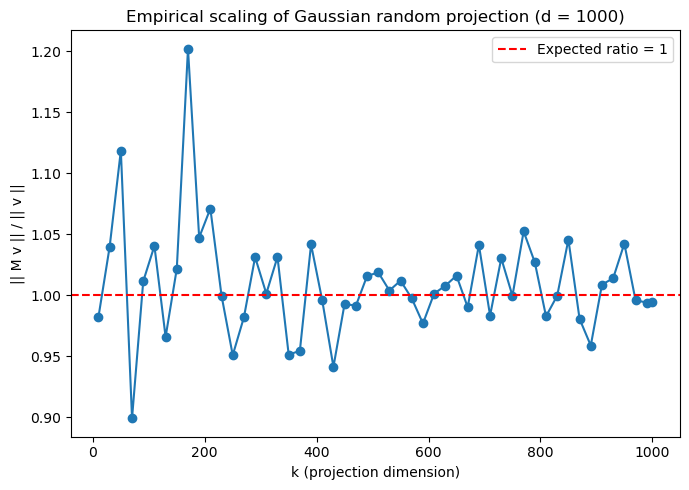

In [2]:
d = 1000
ks, ratios = empirical_ratios(d=d, k_min=10, k_max=1000, k_step=20, seed=123)

np.savetxt("ratios.csv", np.c_[ks, ratios], delimiter=",", header="k,ratio", comments="")

plt.figure(figsize=(7,5))
plt.plot(ks, ratios, marker="o")
plt.axhline(1.0, color="red", linestyle="--", label="Expected ratio = 1")
plt.xlabel("k (projection dimension)")
plt.ylabel(r"|| M v || / || v ||")
plt.title("Empirical scaling of Gaussian random projection (d = 1000)")
plt.legend()
plt.tight_layout()
plt.savefig("ratio_plot.png", dpi=160)
plt.show()